In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from scipy import stats
from sklearn.linear_model import LassoCV

In [2]:
# Load the dataset
df = pd.read_csv('churn_clean.csv', index_col=0)
#Check Data Types
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 1 to 10000
Data columns (total 49 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Customer_id           10000 non-null  object 
 1   Interaction           10000 non-null  object 
 2   UID                   10000 non-null  object 
 3   City                  10000 non-null  object 
 4   State                 10000 non-null  object 
 5   County                10000 non-null  object 
 6   Zip                   10000 non-null  int64  
 7   Lat                   10000 non-null  float64
 8   Lng                   10000 non-null  float64
 9   Population            10000 non-null  int64  
 10  Area                  10000 non-null  object 
 11  TimeZone              10000 non-null  object 
 12  Job                   10000 non-null  object 
 13  Children              10000 non-null  int64  
 14  Age                   10000 non-null  int64  
 15  Income                10

In [3]:
df.head(5)

,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,Population,...,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
CaseOrder,,,,,,,,,,,,,,,,,,,,,
1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,e885b299883d4f9fb18e39c75155d990,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,38,...,172.455519,904.536110,5,5,5,3,4,4,3,4
2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,f2de8bef964785f41a2959829830fb8a,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,10446,...,242.632554,800.982766,3,4,3,3,4,3,4,4
3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,f1784cfa9f6d92ae816197eb175d3c71,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,3735,...,159.947583,2054.706961,4,4,2,4,4,3,3,3
4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,dc8a365077241bb5cd5ccd305136b05e,Del Mar,CA,San Diego,92014,32.96687,-117.24798,13863,...,119.956840,2164.579412,4,4,4,2,5,4,3,3
5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,aabb64a116e83fdc4befc1fbab1663f9,Needville,TX,Fort Bend,77461,29.38012,-95.80673,11352,...,149.948316,271.493436,4,4,4,3,4,4,4,5


In [4]:
# Handle missing values and outliers
print("Initial Missing Values:")
print(df.isnull().sum())

# Identify columns with missing values
columns_with_missing = df.columns[df.isnull().any()]

# Replace missing values or drop rows/columns as needed
# Impute missing values for numerical columns (replace with mean)
for col in columns_with_missing:
    if df[col].dtype == 'float64' or df[col].dtype == 'int64':
        df[col].fillna(df[col].mean(), inplace=True)

# Impute missing values for categorical columns (replace with mode)
for col in columns_with_missing:
    if df[col].dtype == 'object':
        df[col].fillna(df[col].mode()[0], inplace=True)
# Display information about missing values after imputation
print("\nMissing Values After Imputation:")
print(df.isnull().sum())

Initial Missing Values:
Customer_id                0
Interaction                0
UID                        0
City                       0
State                      0
County                     0
Zip                        0
Lat                        0
Lng                        0
Population                 0
Area                       0
TimeZone                   0
Job                        0
Children                   0
Age                        0
Income                     0
Marital                    0
Gender                     0
Churn                      0
Outage_sec_perweek         0
Email                      0
Contacts                   0
Yearly_equip_failure       0
Techie                     0
Contract                   0
Port_modem                 0
Tablet                     0
InternetService         2129
Phone                      0
Multiple                   0
OnlineSecurity             0
OnlineBackup               0
DeviceProtection           0
TechSupport        

In [5]:
#Categorical Columns to Numeric
categorical_columns = ['Techie','Port_modem','Churn','OnlineSecurity','DeviceProtection', 'TechSupport', 'PaperlessBilling', 'Tablet', 'Phone', 'Multiple', 'OnlineBackup', 'StreamingTV', 'StreamingMovies']
for column in categorical_columns:
    df[column] = df[column].map({'Yes': 1, 'No': 0})

In [6]:
#Format
df['Age'] = df['Age'].fillna(0).astype(int)
df['Lng'] = df['Lng'].fillna(0).abs()

In [7]:
area_mapping = {'Urban': 0,'Suburban': 1,'Rural': 2}
marital_mapping = {'Widowed': 0,'Married': 1,'Separated': 2,'Never Married': 3,'Divorced' :4}
gender_mapping = {'Male':0,'Female': 1,'Prefer not to answer': 2}
contract_mapping = {'One year': 0,'Month-to-month': 1,'Two Year': 2}
InternetService_mapping = {'DSL': 0,'Fiber Optic': 1,'None': 2}
PaymentMethod_mapping = {'Bank Transfer(automatic)': 0,'Credit Card (automatic)': 1,'Mailed Check': 2, 'Electronic Check': 3}



df['Area'] = df['Area'].map(area_mapping)
df['Marital'] = df['Marital'].map(marital_mapping)
df['Gender'] = df['Gender'].map(gender_mapping)
df['Contract'] = df['Contract'].map(contract_mapping)
df['InternetService'] = df['InternetService'].map(InternetService_mapping)
df['PaymentMethod'] = df['PaymentMethod'].map(PaymentMethod_mapping)

In [8]:
#Missing Values
df['Gender']= df['Gender'].fillna(df['Gender'].mode()[0])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 1 to 10000
Data columns (total 49 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Customer_id           10000 non-null  object 
 1   Interaction           10000 non-null  object 
 2   UID                   10000 non-null  object 
 3   City                  10000 non-null  object 
 4   State                 10000 non-null  object 
 5   County                10000 non-null  object 
 6   Zip                   10000 non-null  int64  
 7   Lat                   10000 non-null  float64
 8   Lng                   10000 non-null  float64
 9   Population            10000 non-null  int64  
 10  Area                  10000 non-null  int64  
 11  TimeZone              10000 non-null  object 
 12  Job                   10000 non-null  object 
 13  Children              10000 non-null  int64  
 14  Age                   10000 non-null  int32  
 15  Income                10

In [9]:
regress_df=df[['Churn','Gender', 'Age', 'StreamingMovies', 'MonthlyCharge', 'Tenure', 'Outage_sec_perweek', 'Email', 'Contacts', 'Yearly_equip_failure', 'Item1', 'Item2']]

In [10]:
# Save the cleaned dataset to a new CSV file
regress_df.to_csv('cleaned_churn_data.csv', index=False)

In [11]:
# Load the new dataset
data = pd.read_csv('cleaned_churn_data.csv')
#Check Data Types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Churn                 10000 non-null  int64  
 1   Gender                10000 non-null  float64
 2   Age                   10000 non-null  int64  
 3   StreamingMovies       10000 non-null  int64  
 4   MonthlyCharge         10000 non-null  float64
 5   Tenure                10000 non-null  float64
 6   Outage_sec_perweek    10000 non-null  float64
 7   Email                 10000 non-null  int64  
 8   Contacts              10000 non-null  int64  
 9   Yearly_equip_failure  10000 non-null  int64  
 10  Item1                 10000 non-null  int64  
 11  Item2                 10000 non-null  int64  
dtypes: float64(4), int64(8)
memory usage: 937.6 KB


In [12]:
# Handle missing values and outliers
print("Initial Missing Values:")
print(data.isnull().sum())

# Identify columns with missing values
columns_with_missing = data.columns[data.isnull().any()]


Initial Missing Values:
Churn                   0
Gender                  0
Age                     0
StreamingMovies         0
MonthlyCharge           0
Tenure                  0
Outage_sec_perweek      0
Email                   0
Contacts                0
Yearly_equip_failure    0
Item1                   0
Item2                   0
dtype: int64


In [13]:
# Summary dependent variables
data['MonthlyCharge'].value_counts()
data['MonthlyCharge'].describe()

count    10000.000000
mean       172.624816
std         42.943094
min         79.978860
25%        139.979239
50%        167.484700
75%        200.734725
max        290.160419
Name: MonthlyCharge, dtype: float64

In [14]:
#data['MonthlyCharge'].value_counts()
data['Churn'].describe()

count    10000.000000
mean         0.265000
std          0.441355
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: Churn, dtype: float64

In [15]:
data['Gender'].describe()

count    10000.000000
mean         0.525600
std          0.499369
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: Gender, dtype: float64

In [16]:
data['Age'].describe()

count    10000.000000
mean        53.078400
std         20.698882
min         18.000000
25%         35.000000
50%         53.000000
75%         71.000000
max         89.000000
Name: Age, dtype: float64

In [17]:
data['StreamingMovies'].describe()

count    10000.000000
mean         0.489000
std          0.499904
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: StreamingMovies, dtype: float64

In [18]:
data['Tenure'].describe()

count    10000.000000
mean        34.526188
std         26.443063
min          1.000259
25%          7.917694
50%         35.430507
75%         61.479795
max         71.999280
Name: Tenure, dtype: float64

In [19]:
data['Email'].describe()

count    10000.000000
mean        12.016000
std          3.025898
min          1.000000
25%         10.000000
50%         12.000000
75%         14.000000
max         23.000000
Name: Email, dtype: float64

In [20]:
data['Contacts'].describe()

count    10000.000000
mean         0.994200
std          0.988466
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max          7.000000
Name: Contacts, dtype: float64

In [21]:
data['Item1'].describe()

count    10000.000000
mean         3.490800
std          1.037797
min          1.000000
25%          3.000000
50%          3.000000
75%          4.000000
max          7.000000
Name: Item1, dtype: float64

In [22]:
data['Item2'].describe()

count    10000.000000
mean         3.505100
std          1.034641
min          1.000000
25%          3.000000
50%          4.000000
75%          4.000000
max          7.000000
Name: Item2, dtype: float64

In [23]:
data['Yearly_equip_failure'].describe()

count    10000.000000
mean         0.398000
std          0.635953
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          6.000000
Name: Yearly_equip_failure, dtype: float64

In [24]:
data['Outage_sec_perweek'].describe()

count    10000.000000
mean        10.001848
std          2.976019
min          0.099747
25%          8.018214
50%         10.018560
75%         11.969485
max         21.207230
Name: Outage_sec_perweek, dtype: float64

In [25]:
# Summary independent variables
independent_variables = ['Churn', 'Gender', 'Age', 'StreamingMovies', 'Tenure', 'Outage_sec_perweek', 'Email', 'Contacts', 'Yearly_equip_failure', 'Item1', 'Item2']
data[independent_variables].describe()

,Churn,Gender,Age,StreamingMovies,Tenure,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Item1,Item2
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.265000,0.525600,53.078400,0.489000,34.526188,10.001848,12.016000,0.994200,0.398000,3.490800,3.505100
std,0.441355,0.499369,20.698882,0.499904,26.443063,2.976019,3.025898,0.988466,0.635953,1.037797,1.034641
min,0.000000,0.000000,18.000000,0.000000,1.000259,0.099747,1.000000,0.000000,0.000000,1.000000,1.000000
25%,0.000000,0.000000,35.000000,0.000000,7.917694,8.018214,10.000000,0.000000,0.000000,3.000000,3.000000
50%,0.000000,1.000000,53.000000,0.000000,35.430507,10.018560,12.000000,1.000000,0.000000,3.000000,4.000000
75%,1.000000,1.000000,71.000000,1.000000,61.479795,11.969485,14.000000,2.000000,1.000000,4.000000,4.000000
max,1.000000,1.000000,89.000000,1.000000,71.999280,21.207230,23.000000,7.000000,6.000000,7.000000,7.000000


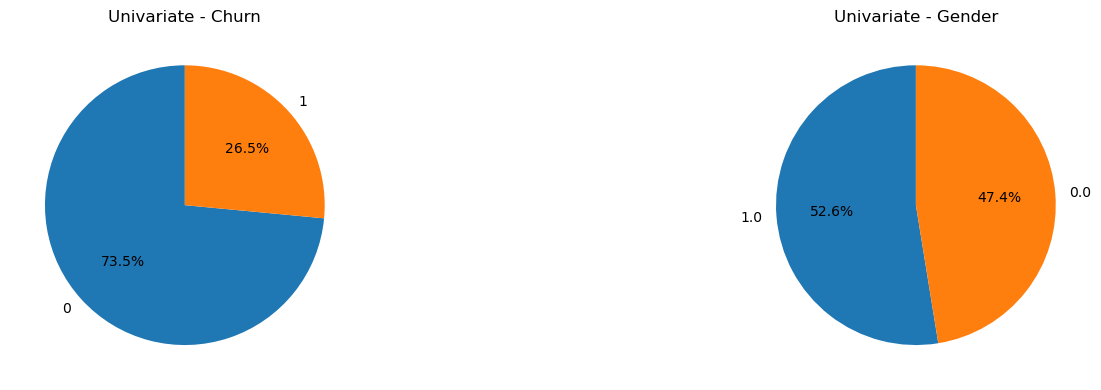

In [26]:

# Select variables for analysis
variables = ['Churn', 'Gender']

# Univariate Visualizations
fig, axes = plt.subplots(nrows=1, ncols=len(variables), figsize=(18, 4))

for i, var in enumerate(variables):
    counts = data[var].value_counts()
    axes[i].pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90)
    axes[i].set_title(f'Univariate - {var}')

plt.tight_layout()
plt.show()


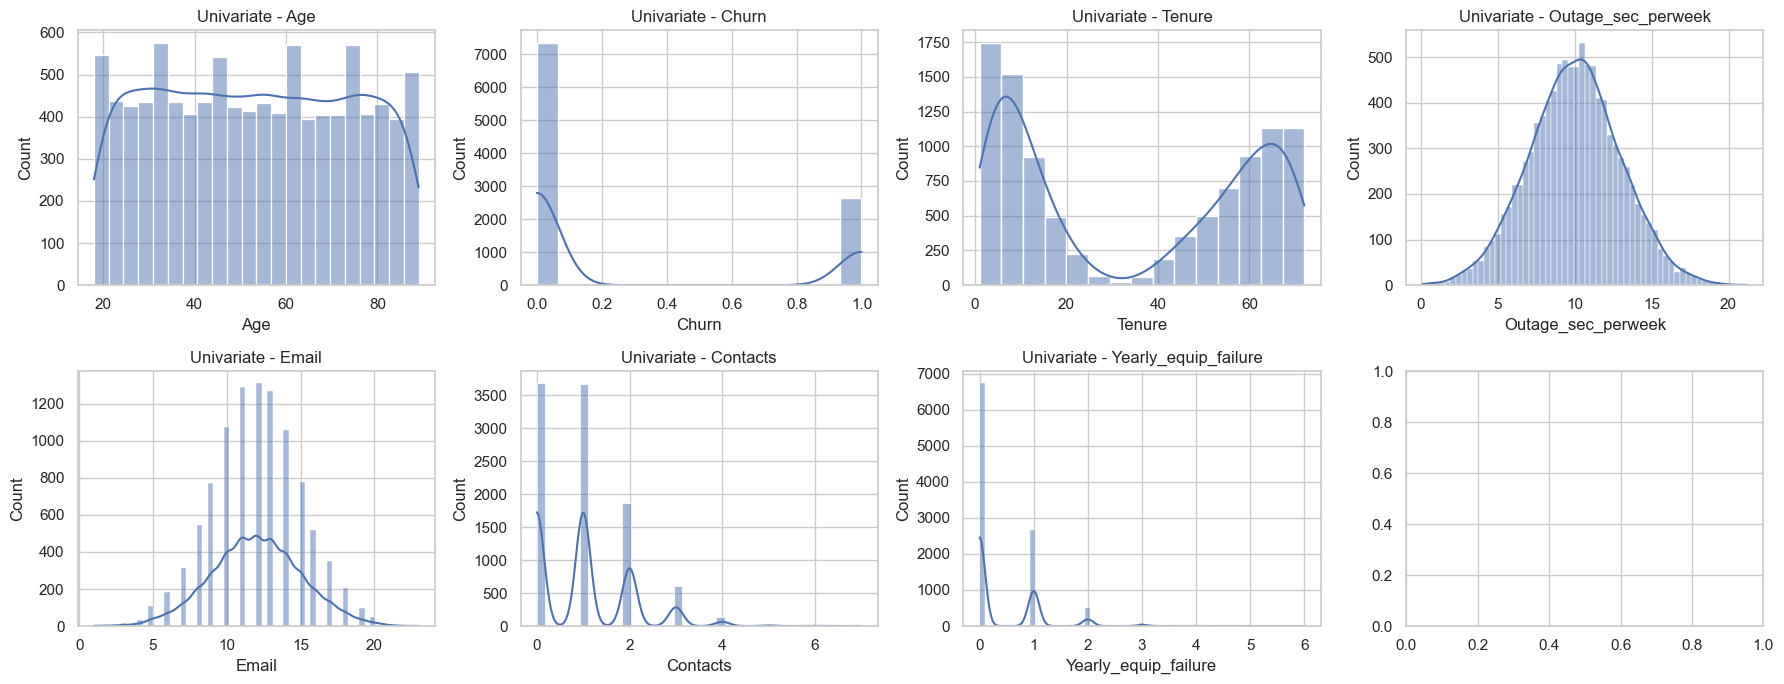

In [27]:
# Set the style for seaborn plots
sns.set(style="whitegrid")

# Select variables for analysis
variables = ['Age', 'Churn', 'Tenure', 'Outage_sec_perweek', 'Email', 'Contacts', 'Yearly_equip_failure']

# Univariate Visualizations
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(18, 7))

for i, var in enumerate(variables):
    sns.histplot(data[var], kde=True, ax=axes[i // 4, i % 4])
    axes[i // 4, i % 4].set_title(f'Univariate - {var}')

plt.tight_layout()
plt.show()

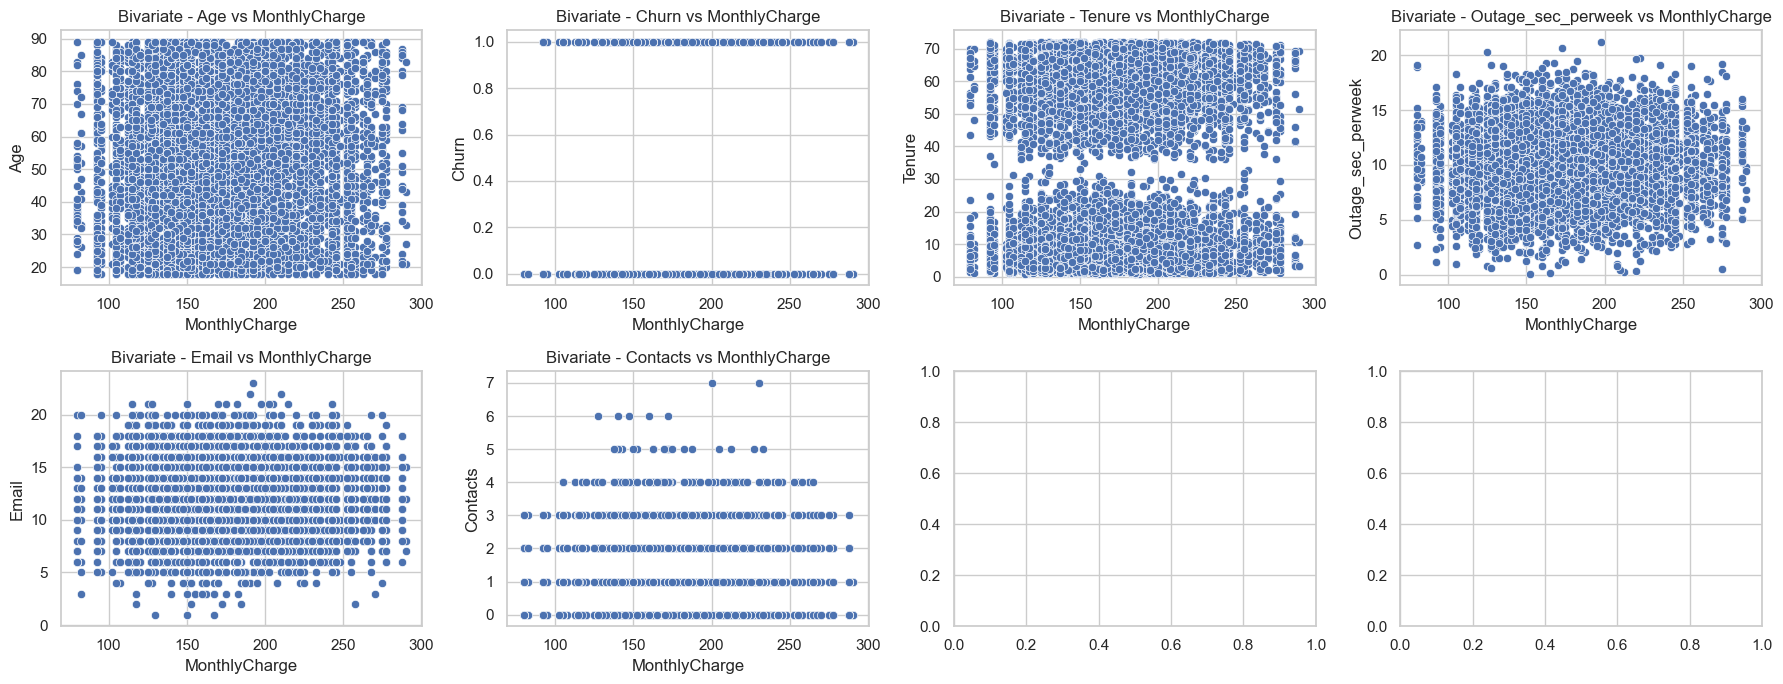

In [28]:
# Bivariate Visualizations
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(18, 7))

for i, var in enumerate(variables[:-1]):
    sns.scatterplot(x='MonthlyCharge', y=var, data=data, ax=axes[i // 4, i % 4])
    axes[i // 4, i % 4].set_title(f'Bivariate - {var} vs MonthlyCharge')

plt.tight_layout()
plt.show()

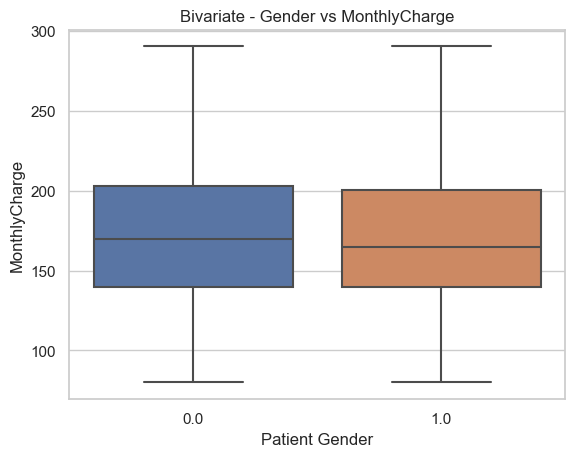

In [29]:
# Set the style for seaborn plots
sns.set(style="whitegrid")
plt.title(f'Bivariate - Gender vs MonthlyCharge')

sns.boxplot(data=data, x='Gender', y='MonthlyCharge' )

plt.xlabel("Patient Gender")
plt.show()


In [30]:
#Initial Multiple Linear Regression Model

X = data[['Gender', 'Age', 'StreamingMovies', 'Churn', 'Tenure', 'Outage_sec_perweek', 'Email', 'Contacts', 'Yearly_equip_failure', 'Item1', 'Item2']]
y = data['MonthlyCharge']
#X = sm.add_constant(X)  
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:          MonthlyCharge   R-squared (uncentered):                   0.957
Model:                            OLS   Adj. R-squared (uncentered):              0.957
Method:                 Least Squares   F-statistic:                          2.008e+04
Date:                Fri, 08 Dec 2023   Prob (F-statistic):                        0.00
Time:                        12:26:08   Log-Likelihood:                         -50300.
No. Observations:               10000   AIC:                                  1.006e+05
Df Residuals:                    9989   BIC:                                  1.007e+05
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

In [31]:
results.resid.std(ddof=X.shape[1])

36.94880714315487

In [32]:

# Calculate VIF for each variable
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Display the VIF values
print(vif_data)


                Variable        VIF
0                 Gender   2.064443
1                    Age   6.709302
2        StreamingMovies   2.186649
3                  Churn   1.948565
4                 Tenure   3.446099
5     Outage_sec_perweek   9.715195
6                  Email  11.968393
7               Contacts   1.983107
8   Yearly_equip_failure   1.381953
9                  Item1  20.995011
10                 Item2  21.394330


In [33]:
# Function to calculate VIF and drop variables with VIF above a threshold
def calculate_vif(data, threshold=11):
    variables = list(range(data.shape[1]))
    dropped = True
    while dropped:
        dropped = False
        vif = [variance_inflation_factor(data.iloc[:, variables].values, i) for i in range(data.iloc[:, variables].shape[1])]
        max_vif = max(vif)
        if max_vif > threshold:
            max_vif_index = vif.index(max_vif)
            del variables[max_vif_index]
            dropped = True
    remaining_vars = data.columns[variables]
    return data[remaining_vars]

# Apply VIF-based feature selection
X_vif_filtered = calculate_vif(X, threshold=11)

# Fit Lasso regression model on the filtered features
lasso_model = LassoCV()
lasso_model.fit(X_vif_filtered, y)

# Get selected feature coefficients
selected_coeffs = lasso_model.coef_

# Get selected feature names
selected_features_lasso = X_vif_filtered.columns[selected_coeffs != 0]

# Display selected features using Lasso
print("Selected Features (Lasso):", selected_features_lasso)


Selected Features (Lasso): Index(['Age', 'StreamingMovies', 'Churn', 'Tenure', 'Outage_sec_perweek',
       'Contacts', 'Item1'],
      dtype='object')


In [34]:

# Updated Multiple Linear Regression Model with selected variables
X_selected = data[['Age', 'StreamingMovies','Churn', 'Tenure', 'Contacts', 'Outage_sec_perweek', 'Item1']]
y = data['MonthlyCharge']
X_selected = sm.add_constant(X_selected)  # Adding a constant term
model_selected = sm.OLS(y, X_selected)
results_selected = model_selected.fit()

# Calculate VIF for each variable
vif_data_selected = pd.DataFrame()
vif_data_selected["Variable"] = X_selected.columns
vif_data_selected["VIF"] = [variance_inflation_factor(X_selected.values, i) for i in range(X_selected.shape[1])]

# Display the VIF values after feature selection
print(results_selected.summary())
print(vif_data_selected)


                            OLS Regression Results                            
Dep. Variable:          MonthlyCharge   R-squared:                       0.427
Model:                            OLS   Adj. R-squared:                  0.426
Method:                 Least Squares   F-statistic:                     1063.
Date:                Fri, 08 Dec 2023   Prob (F-statistic):               0.00
Time:                        12:26:09   Log-Likelihood:                -49005.
No. Observations:               10000   AIC:                         9.803e+04
Df Residuals:                    9992   BIC:                         9.808e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                131.1741      1

In [35]:
# Updated Multiple Linear Regression Model with selected variables
X_selected = data[['StreamingMovies', 'Churn', 'Tenure']]
y = data['MonthlyCharge']
X_selected = sm.add_constant(X_selected)  # Adding a constant term
model_selected = sm.OLS(y, X_selected)
results_selectedd = model_selected.fit()

# Calculate VIF for each variable
vif_data_selected = pd.DataFrame()
vif_data_selected["Variable"] = X_selected.columns
vif_data_selected["VIF"] = [variance_inflation_factor(X_selected.values, i) for i in range(X_selected.shape[1])]

# Display the updated results
print(results_selectedd.summary())
print(vif_data_selected)


                            OLS Regression Results                            
Dep. Variable:          MonthlyCharge   R-squared:                       0.426
Model:                            OLS   Adj. R-squared:                  0.426
Method:                 Least Squares   F-statistic:                     2476.
Date:                Fri, 08 Dec 2023   Prob (F-statistic):               0.00
Time:                        12:26:09   Log-Likelihood:                -49010.
No. Observations:               10000   AIC:                         9.803e+04
Df Residuals:                    9996   BIC:                         9.806e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             135.4141      0.727    1

In [36]:
# Calculate the residual standard deviation
residual_std = results_selectedd.resid.std()

# Display the residual standard deviation
print("Residual Standard Deviation:", residual_std)

Residual Standard Deviation: 32.526705919910576


In [37]:
print(f"Upon analyzing the linear regression model, I've uncovered an interesting metric called the Residual Standard Deviation.")
print(f"The Residual Standard Deviation, also known as the standard error of the residuals, is approximately {residual_std:.2f}.")
print(f"This value represents the spread or dispersion of the residuals, which are the differences between the actual and predicted values.")
print(f"In simpler terms, on average, the actual values of 'MonthlyCharge' deviate from the values predicted by the model by around {residual_std:.2f} units.")
print(f"A lower value suggests a more precise fit, while a higher value indicates greater variability in the residuals.")


Upon analyzing the linear regression model, I've uncovered an interesting metric called the Residual Standard Deviation.
The Residual Standard Deviation, also known as the standard error of the residuals, is approximately 32.53.
This value represents the spread or dispersion of the residuals, which are the differences between the actual and predicted values.
In simpler terms, on average, the actual values of 'MonthlyCharge' deviate from the values predicted by the model by around 32.53 units.
A lower value suggests a more precise fit, while a higher value indicates greater variability in the residuals.


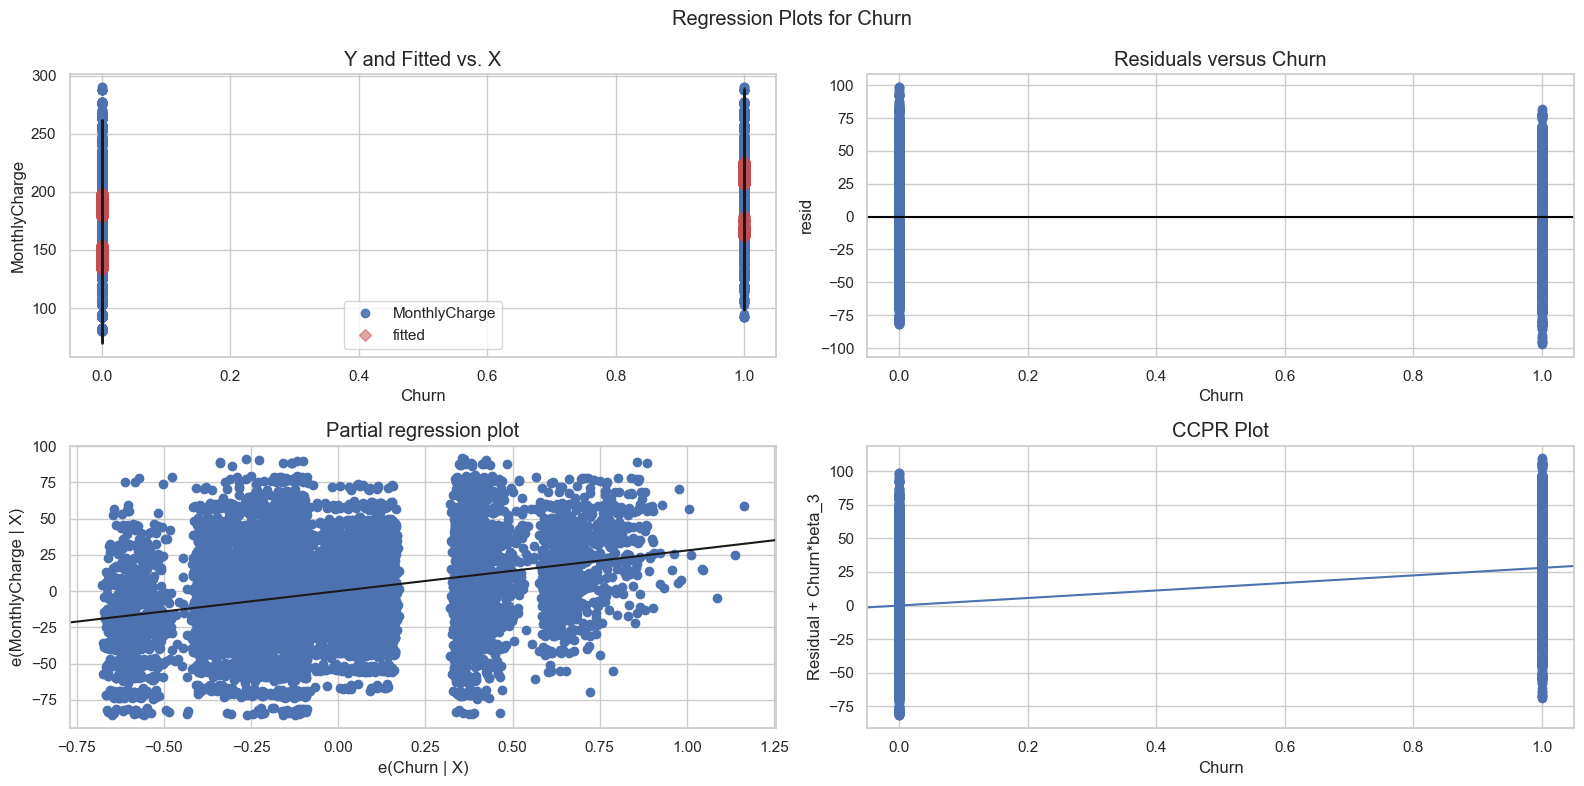

In [38]:
fig = plt.figure(figsize = [16,8])
sm.graphics.plot_regress_exog(results_selected, 'Churn', fig=fig);

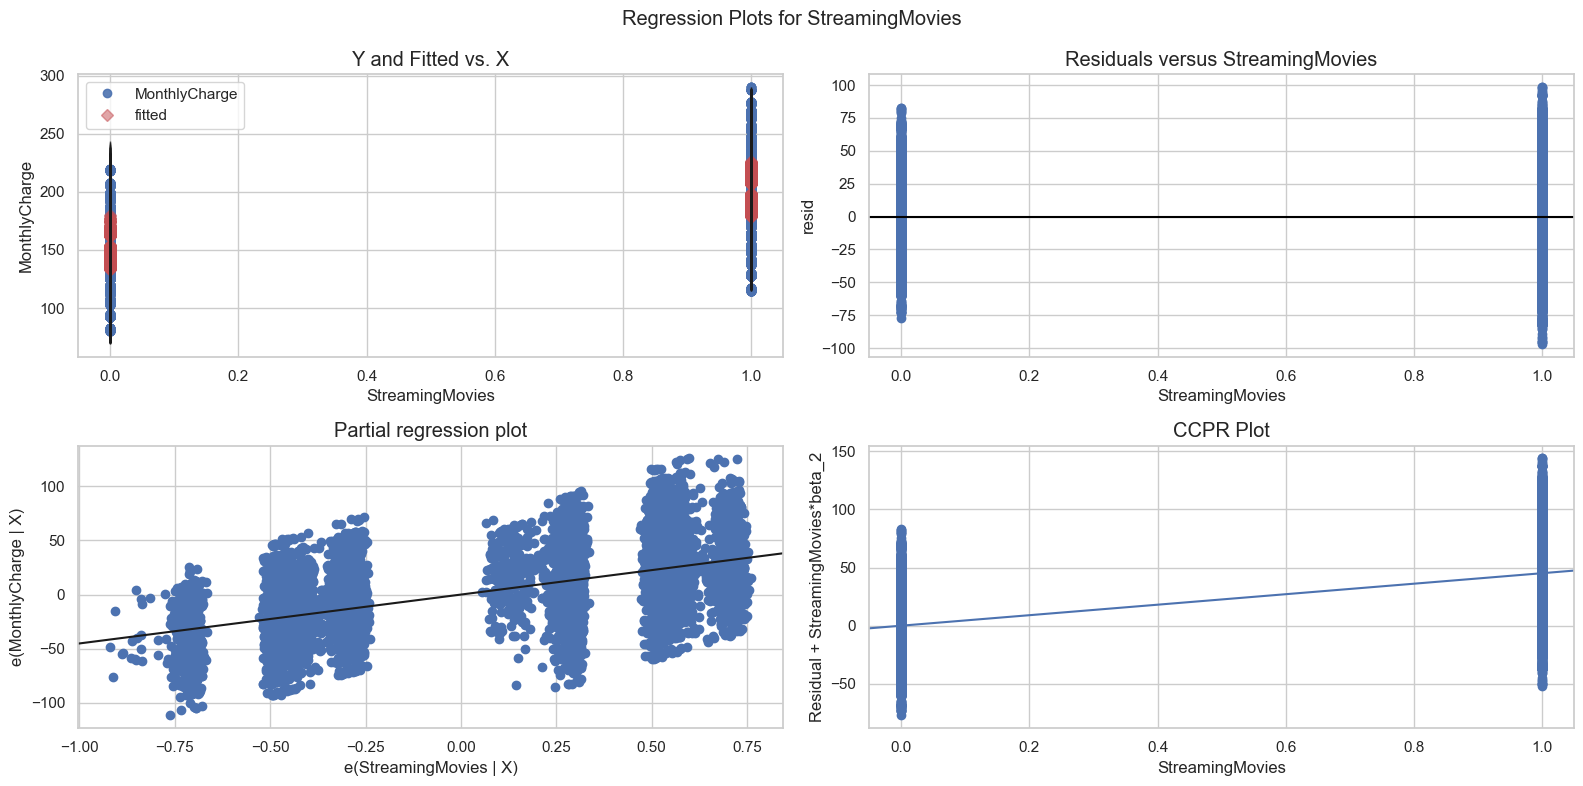

In [39]:
fig = plt.figure(figsize = [16,8])
sm.graphics.plot_regress_exog(results_selected, 'StreamingMovies', fig=fig);

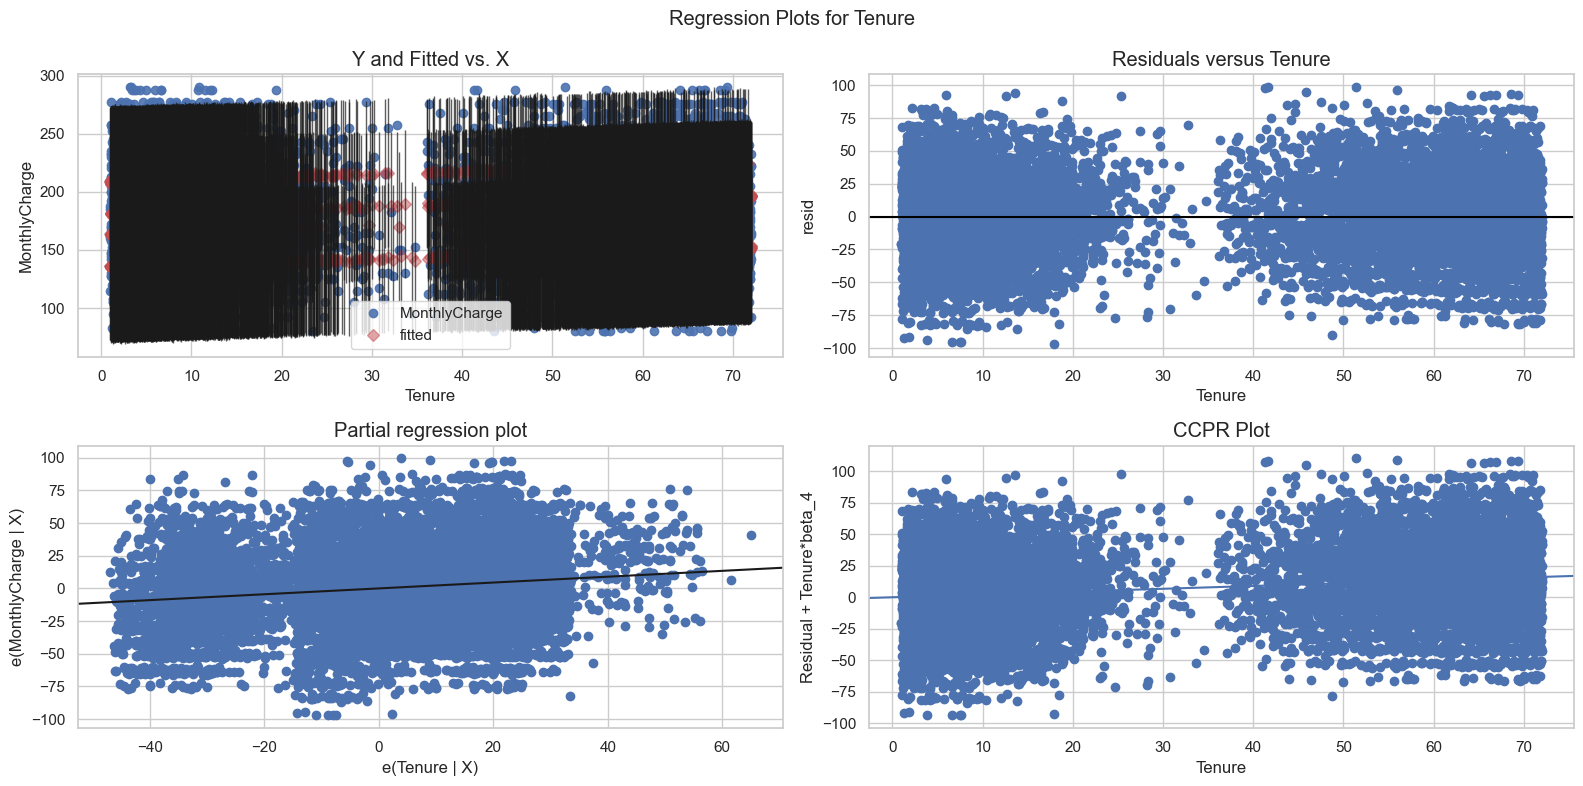

In [40]:
fig = plt.figure(figsize = [16,8])
sm.graphics.plot_regress_exog(results_selected, 'Tenure', fig=fig);